# Data Analyst Professional Practical Exam - Product Sales Analysis

**Analyst:** [Your Name]  
**Date:** October 25, 2025  
**Client:** Pens and Printers - Sales Team

---

## 📋 Executive Summary

This report analyzes the effectiveness of three sales methods (Email, Call, Email + Call) for a new office stationery product line launched 6 weeks ago.

---

## 📊 Business Context

### Sales Methods Tested:
- **Email:** Two emails (minimal team effort - ~2 min)
- **Call:** Phone call (~30 min per customer - high effort)
- **Email + Call:** Email + 10-min call (moderate effort - ~12 min)

### Key Business Questions:
1. How many customers were there for each approach?
2. What does the spread of the revenue look like overall? And for each method?
3. Was there any difference in revenue over time for each of the methods?
4. Which method should we continue to use?

---

## 1️⃣ DATA LOADING & INITIAL EXPLORATION

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load data
df = pd.read_csv('product_sales.csv')

print("Dataset loaded successfully!")
print(f"Total rows: {len(df):,}")
print(f"Total columns: {len(df.columns)}")
print("\nFirst 10 rows:")
df.head(10)

Dataset loaded successfully!
Total rows: 15,000
Total columns: 8

First 10 rows:


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois
5,6,Call,6489e678-40f2-4fed-a48e-d0dff9c09205,13,65.01,10,24,Mississippi
6,4,Email,eb6bd5f1-f115-4e4b-80a6-5e67fcfbfb94,11,113.38,9,28,Georgia
7,1,Email,047df079-071b-4380-9012-2bfe9bce45d5,10,99.94,1,22,Oklahoma
8,5,Email,771586bd-7b64-40be-87df-afe884d2af9e,11,108.34,10,31,Massachusetts
9,5,Call,56491dae-bbe7-49f0-a651-b823a01103d8,11,53.82,7,23,Missouri


In [2]:
# Basic dataset information
print("Dataset Info:")
print("="*50)
df.info()

print("\n" + "="*50)
print("Column Names:")
print("="*50)
for col in df.columns:
    print(f"{col:20s}: {df[col].dtype}")

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB

Column Names:
week                : int64
sales_method        : object
customer_id         : object
nb_sold             : int64
revenue             : float64
years_as_customer   : int64
nb_site_visits      : int64
state               : object


---

## 2️⃣ DATA VALIDATION & CLEANING

**Required:** Description of validating and cleaning steps for EVERY column

### 2.1 Missing Values Analysis

In [3]:
# Check missing values
print("Missing Values Analysis")
print("="*65)

total_rows = len(df)
missing_counts = df.isnull().sum()
missing_pct = (missing_counts / total_rows * 100).round(2)

missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_counts.values,
    'Missing_Percentage': missing_pct.values,
    'Data_Type': df.dtypes.values
})

print(missing_df.to_string(index=False))

print("\n" + "="*65)
print("FINDINGS:")
print("="*65)
for col in df.columns:
    if missing_counts[col] > 0:
        print(f"{col}: {missing_counts[col]:,} missing values. ({missing_pct[col]:.2f}%) of total")
    else:
        print(f"{col}: No missing values")

Missing Values Analysis
           Column  Missing_Count  Missing_Percentage Data_Type
             week              0                0.00     int64
     sales_method              0                0.00    object
      customer_id              0                0.00    object
          nb_sold              0                0.00     int64
          revenue           1074                7.16   float64
years_as_customer              0                0.00     int64
   nb_site_visits              0                0.00     int64
            state              0                0.00    object

FINDINGS:
week: No missing values
sales_method: No missing values
customer_id: No missing values
nb_sold: No missing values
revenue: 1,074 missing values. (7.16%) of total
years_as_customer: No missing values
nb_site_visits: No missing values
state: No missing values


### 2.2 Column-by-Column Validation

In [4]:
print("COLUMN 1: week")
print("="*50)
print(f"Expected: Numeric, weeks since product launch (1-6)")
print(f"Actual range: {df['week'].min()} to {df['week'].max()}")
print(f"Unique values: {df['week'].nunique()}")
print(f"Value counts:\n{df['week'].value_counts().sort_index()}")

print("="*50)
print(f"VALID: Week values are within expected range (1-6)")

COLUMN 1: week
Expected: Numeric, weeks since product launch (1-6)
Actual range: 1 to 6
Unique values: 6
Value counts:
week
1    3721
2    2491
3    2411
4    2575
5    2574
6    1228
Name: count, dtype: int64
VALID: Week values are within expected range (1-6)


In [5]:
print("COLUMN 2: sales_method")
print("="*50)
print(f"Expected: 'Email', 'Call', 'Email + Call'")
print(f"\nActual unique values BEFORE cleaning:")
print(df['sales_method'].value_counts())

print(f"\nAll unique values:")
for val in df['sales_method'].unique():
    print(f"  - '{val}'")
    
print("="*80)
print("ACTION: Need to replace 'em + call' with 'Email + Call' and 'email' with 'Email'")

COLUMN 2: sales_method
Expected: 'Email', 'Call', 'Email + Call'

Actual unique values BEFORE cleaning:
sales_method
Email           7456
Call            4962
Email + Call    2549
em + call         23
email             10
Name: count, dtype: int64

All unique values:
  - 'Email'
  - 'Email + Call'
  - 'Call'
  - 'em + call'
  - 'email'
ACTION: Need to replace 'em + call' with 'Email + Call' and 'email' with 'Email'


In [6]:
# CLEANING: Standardize sales_method values
print("CLEANING: Standardizing sales_method values...")
print("="*50)

# Replace inconsistent values
df['sales_method'] = df['sales_method'].replace({
    'em + call': 'Email + Call',
    'email': 'Email',
})

print("AFTER cleaning:")
print(df['sales_method'].value_counts())
print("="*50)
print("CLEANED: All sales_method values standardized")

CLEANING: Standardizing sales_method values...
AFTER cleaning:
sales_method
Email           7466
Call            4962
Email + Call    2572
Name: count, dtype: int64
CLEANED: All sales_method values standardized


In [7]:
print("COLUMN 3: customer_id")
print("="*50)
print(f"Expected: Unique identifier (UUID format)")
print(f"Total rows: {len(df):,}")
print(f"Unique customer IDs: {df['customer_id'].nunique():,}")
print(f"Duplicate customer IDs: {len(df) - df['customer_id'].nunique():,}")

customer_purchases = df['customer_id'].value_counts()
customers_with_multiple = customer_purchases[customer_purchases > 1]

if len(customers_with_multiple) > 0:
    print(f"\n⚠️  {len(customers_with_multiple):,} customers made multiple purchases")
    print(f"Max purchases by single customer: {customer_purchases.max()}")
else:
    print(f"Each customer appears only once")

print(f"VALID: Customer IDs are in proper format")

COLUMN 3: customer_id
Expected: Unique identifier (UUID format)
Total rows: 15,000
Unique customer IDs: 15,000
Duplicate customer IDs: 0
Each customer appears only once
VALID: Customer IDs are in proper format


In [8]:
print("COLUMN 4: nb_sold")
print("="*50)
print(f"Expected: Numeric, positive integers")
print(f"Range: {df['nb_sold'].min()} to {df['nb_sold'].max()}")
print(f"Mean: {df['nb_sold'].mean():.2f}")
print(f"Median: {df['nb_sold'].median():.1f}")

if df['nb_sold'].min() < 0:
    print(f"ERROR: Negative values found!")
else:
    print(f"VALID: All values are positive integers")

COLUMN 4: nb_sold
Expected: Numeric, positive integers
Range: 7 to 16
Mean: 10.08
Median: 10.0
VALID: All values are positive integers


In [9]:
print("COLUMN 5: revenue")
print("="*50)
print(f"Expected: Numeric, revenue in dollars (2 decimal places)")
print(f"Missing values: {df['revenue'].isnull().sum():,} ({df['revenue'].isnull().sum()/len(df)*100:.2f}%)")

revenue_clean = df['revenue'].dropna()

print(f"\nRevenue Statistics (excluding missing):") 
print(f"  Count: {len(revenue_clean):,}")
print(f"  Min: ${revenue_clean.min():.2f}")
print(f"  Max: ${revenue_clean.max():.2f}")
print(f"  Mean: ${revenue_clean.mean():.2f}")
print(f"  Median: ${revenue_clean.median():.2f}")
print(f"  Std Dev: ${revenue_clean.std():.2f}")

negative_revenue = df[df['revenue'] < 0]

if len(negative_revenue) > 0:
    print(f"ERROR: {len(negative_revenue)} negative revenue values!")
else:
    print(f"VALID: No negative revenue values")

print(f"ACTION: Missing revenue values will be excluded from revenue analysis")

COLUMN 5: revenue
Expected: Numeric, revenue in dollars (2 decimal places)
Missing values: 1,074 (7.16%)

Revenue Statistics (excluding missing):
  Count: 13,926
  Min: $32.54
  Max: $238.32
  Mean: $93.93
  Median: $89.50
  Std Dev: $47.44
VALID: No negative revenue values
ACTION: Missing revenue values will be excluded from revenue analysis


In [10]:
# Add this to your analysis
print("\nCONVERSION ANALYSIS:")
print("="*50)

for method in df['sales_method'].unique():
    method_data = df[df['sales_method'] == method]
    total_contacted = len(method_data)
    with_revenue = method_data['revenue'].notna().sum()
    conversion_rate = (with_revenue / total_contacted) * 100
    
    print(f"\n{method}:")
    print(f"  Contacted: {total_contacted:,}")
    print(f"  Purchased: {with_revenue:,}")
    print(f"  Not Purchased: {total_contacted - with_revenue:,}")
    print(f"  Conversion Rate: {conversion_rate:.1f}%")


CONVERSION ANALYSIS:

Email:
  Contacted: 7,466
  Purchased: 6,922
  Not Purchased: 544
  Conversion Rate: 92.7%

Email + Call:
  Contacted: 2,572
  Purchased: 2,223
  Not Purchased: 349
  Conversion Rate: 86.4%

Call:
  Contacted: 4,962
  Purchased: 4,781
  Not Purchased: 181
  Conversion Rate: 96.4%


In [11]:
# ============================================
# CONVERSION & REVENUE ANALYSIS
# ============================================
print("\n" + "="*60)
print("CONVERSION ANALYSIS (Filling Missing with $0)")
print("="*60)

# Create a version with 0s for conversion analysis
df['revenue_with_zeros'] = df['revenue'].fillna(0)

for method in df['sales_method'].unique():
    method_data = df[df['sales_method'] == method]
    
    # Conversion metrics
    total_contacted = len(method_data)
    purchased = method_data['revenue'].notna().sum()
    conversion_rate = (purchased / total_contacted) * 100
    
    # Revenue metrics (with zeros)
    avg_revenue_per_contact = method_data['revenue_with_zeros'].mean()
    
    # Revenue metrics (purchasers only)
    avg_revenue_per_purchaser = method_data['revenue'].mean()
    
    print(f"\n{method}:")
    print(f"  Customers contacted: {total_contacted:,}")
    print(f"  Purchased: {purchased:,} ({conversion_rate:.1f}%)")
    print(f"  Avg revenue per contact: ${avg_revenue_per_contact:.2f}")
    print(f"  Avg revenue per purchaser: ${avg_revenue_per_purchaser:.2f}")


CONVERSION ANALYSIS (Filling Missing with $0)

Email:
  Customers contacted: 7,466
  Purchased: 6,922 (92.7%)
  Avg revenue per contact: $90.05
  Avg revenue per purchaser: $97.13

Email + Call:
  Customers contacted: 2,572
  Purchased: 2,223 (86.4%)
  Avg revenue per contact: $158.73
  Avg revenue per purchaser: $183.65

Call:
  Customers contacted: 4,962
  Purchased: 4,781 (96.4%)
  Avg revenue per contact: $45.86
  Avg revenue per purchaser: $47.60


In [12]:
print("COLUMN 6: years_as_customer")
print("="*60)
print(f"Expected: Numeric, years (0 to 41, company founded in 1984)")
print(f"Range: {df['years_as_customer'].min()} to {df['years_as_customer'].max()} years")
print(f"Mean: {df['years_as_customer'].mean():.2f} years")
print(f"Median: {df['years_as_customer'].median():.1f} years")

company_age = 2025 - 1984
print("company_age: " + str(company_age))
invalid_years = df[df['years_as_customer'] > company_age]
if len(invalid_years) > 0:
    print(f"\nERROR: {len(invalid_years)} customers with tenure > company age!")
    print("Those are the customers:")
    print(invalid_years[['customer_id', 'years_as_customer']].to_string(index=False))
else:
    print(f"\nVALID: All values within expected range (0-{company_age})")

COLUMN 6: years_as_customer
Expected: Numeric, years (0 to 41, company founded in 1984)
Range: 0 to 63 years
Mean: 4.97 years
Median: 3.0 years
company_age: 41

ERROR: 2 customers with tenure > company age!
Those are the customers:
                         customer_id  years_as_customer
18919515-a618-430c-9a05-2c7d8fea96af                 63
2ea97d34-571d-4e1b-95be-fea1c404649f                 47


In [13]:
print("COLUMN 7: nb_site_visits")
print("="*50)
print(f"Expected: Numeric, website visits in last 6 months")
print(f"Range: {df['nb_site_visits'].min()} to {df['nb_site_visits'].max()} visits")
print(f"Mean: {df['nb_site_visits'].mean():.2f}")
print(f"Median: {df['nb_site_visits'].median():.1f}")

if df['nb_site_visits'].min() < 0:
    print(f"\nERROR: Negative values found!")
else:
    print(f"\nVALID: All values are non-negative")

COLUMN 7: nb_site_visits
Expected: Numeric, website visits in last 6 months
Range: 12 to 41 visits
Mean: 24.99
Median: 25.0

VALID: All values are non-negative


In [14]:
print("COLUMN 8: state")
print("="*50)
print(f"Expected: Character, US state names")
print(f"Unique states: {df['state'].nunique()}")
print(f"\nTop 10 states:")
print(df['state'].value_counts().head(10))
print(f"\nVALID: State values appear correct")

COLUMN 8: state
Expected: Character, US state names
Unique states: 50

Top 10 states:
state
California        1872
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
Name: count, dtype: int64

VALID: State values appear correct


### 2.3 Data Cleaning Summary

In [15]:
print("="*50)
print("DATA VALIDATION & CLEANING SUMMARY")
print("="*50)

print("\n✅ CLEANED:")
print("  - Standardized sales_method values")

print("\n⚠️  ISSUES IDENTIFIED:")
print(f"  - revenue: {df['revenue'].isnull().sum():,} missing values ({df['revenue'].isnull().sum()/len(df)*100:.2f}%)")
print(f"    → These will be EXCLUDED from revenue calculations")

print("\n✅ ALL OTHER COLUMNS: No issues found")

print("\n📊 FINAL DATASET:")
print(f"  - Total rows: {len(df):,}")
print(f"  - Rows with revenue: {df['revenue'].notna().sum():,}")
print(f"  - Unique customers: {df['customer_id'].nunique():,}")
print(f"  - Sales methods: {df['sales_method'].nunique()}")
print(f"  - Time period: Weeks {df['week'].min()}-{df['week'].max()}")
print("\n" + "="*50)

DATA VALIDATION & CLEANING SUMMARY

✅ CLEANED:
  - Standardized sales_method values

⚠️  ISSUES IDENTIFIED:
  - revenue: 1,074 missing values (7.16%)
    → These will be EXCLUDED from revenue calculations

✅ ALL OTHER COLUMNS: No issues found

📊 FINAL DATASET:
  - Total rows: 15,000
  - Rows with revenue: 13,926
  - Unique customers: 15,000
  - Sales methods: 3
  - Time period: Weeks 1-6



---

## 3️⃣ EXPLORATORY DATA ANALYSIS

Addressing business questions with required visualizations:
- ✅ Two single-variable graphics
- ✅ One multi-variable graphic

### 🔍 Question 1: How many customers were there for each approach?

In [16]:
#  Consistent color mapping
color_map = {
    'Email': '#2E86AB',           # Blue
    'Call': '#A23B72',            # Purple/Magenta
    'Email + Call': '#F18F01'     # Orange
}

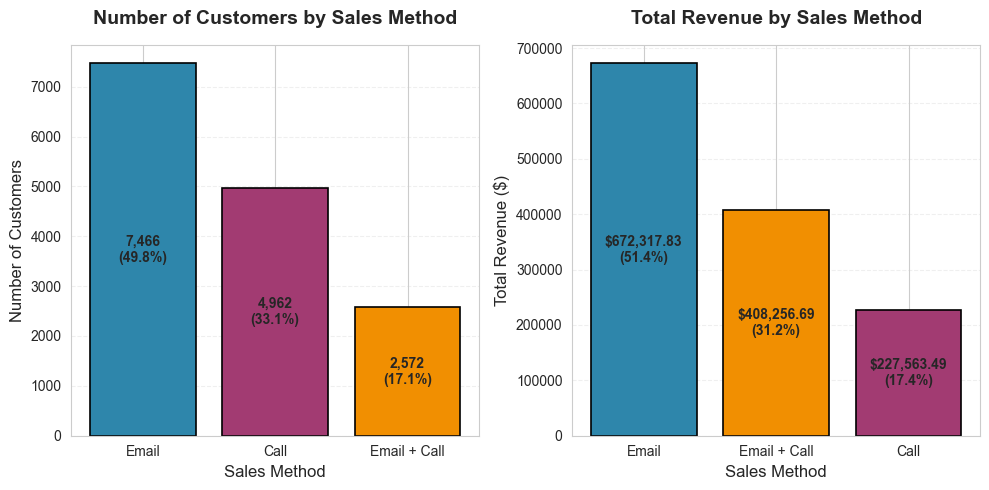

CUSTOMER DISTRIBUTION BY SALES METHOD
Email          : 7,466 customers ( 49.8%)
Call           : 4,962 customers ( 33.1%)
Email + Call   : 2,572 customers ( 17.1%)
TOTAL          : 15,000 customers

REVENUE BY SALES METHOD
Email          : $  672,317.83 ( 51.4%)
Email + Call   : $  408,256.69 ( 31.2%)
Call           : $  227,563.49 ( 17.4%)
TOTAL          : $1,308,138.01

AVERAGE REVENUE PER CUSTOMER
Email          : $       90.05
Call           : $       45.86
Email + Call   : $      158.73


In [17]:
# Customer and Revenue Analysis
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# ===== 1. Number of Customers =====
customer_counts = df.groupby('sales_method')['customer_id'].nunique().sort_values(ascending=False)
colors1 = [color_map[method] for method in customer_counts.index]

bars1 = axes[0].bar(customer_counts.index, customer_counts.values, color=colors1, edgecolor='black', linewidth=1.2)

axes[0].set_title('Number of Customers by Sales Method', fontsize=14, fontweight='bold', pad=15)
axes[0].set_xlabel('Sales Method', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars1:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, height/2,
                f'{int(height):,}\n({height/customer_counts.sum()*100:.1f}%)',
                ha='center', va='center', fontsize=10, fontweight='bold')

# ===== 2. Total Revenue =====
revenue_by_method = df.groupby('sales_method')['revenue'].sum().sort_values(ascending=False)
colors2 = [color_map[method] for method in revenue_by_method.index]

bars2 = axes[1].bar(revenue_by_method.index, revenue_by_method.values,
                     color=colors2, edgecolor='black', linewidth=1.2)
axes[1].set_title('Total Revenue by Sales Method', fontsize=14, fontweight='bold', pad=15)
axes[1].set_xlabel('Sales Method', fontsize=12)
axes[1].set_ylabel('Total Revenue ($)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3, linestyle='--')

for bar in bars2:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, 
                height/2,
                f'${height:,}\n({height/revenue_by_method.sum()*100:.1f}%)',
                ha='center', 
                va='center', 
                fontsize=10, 
                fontweight='bold')

plt.tight_layout()
plt.savefig('q1_customers_revenue.png', dpi=300, bbox_inches='tight')
plt.show()

# Print Summary
print("="*50)
print("CUSTOMER DISTRIBUTION BY SALES METHOD")
print("="*50)
for method in customer_counts.index:
    count = customer_counts[method]
    pct = count / customer_counts.sum() * 100
    print(f"{method:15s}: {count:5,} customers ({pct:5.1f}%)")
print(f"{'TOTAL':15s}: {customer_counts.sum():5,} customers")

print("\n" + "="*50)
print("REVENUE BY SALES METHOD")
print("="*50)
for method in revenue_by_method.index:
    rev = revenue_by_method[method]
    pct = rev / revenue_by_method.sum() * 100
    print(f"{method:15s}: ${rev:12,.2f} ({pct:5.1f}%)")
print(f"{'TOTAL':15s}: ${revenue_by_method.sum():12,.2f}")

# Average revenue per customer
print("\n" + "="*50)
print("AVERAGE REVENUE PER CUSTOMER")
print("="*50)
for method in customer_counts.index:
    avg_rev = revenue_by_method[method] / customer_counts[method]
    print(f"{method:15s}: ${avg_rev:12,.2f}")


### 🔍 Question 2: What does the spread of the revenue look like overall? And for each method?

#### 2a. Overall Revenue Distribution (Single Variable Analysis #1)

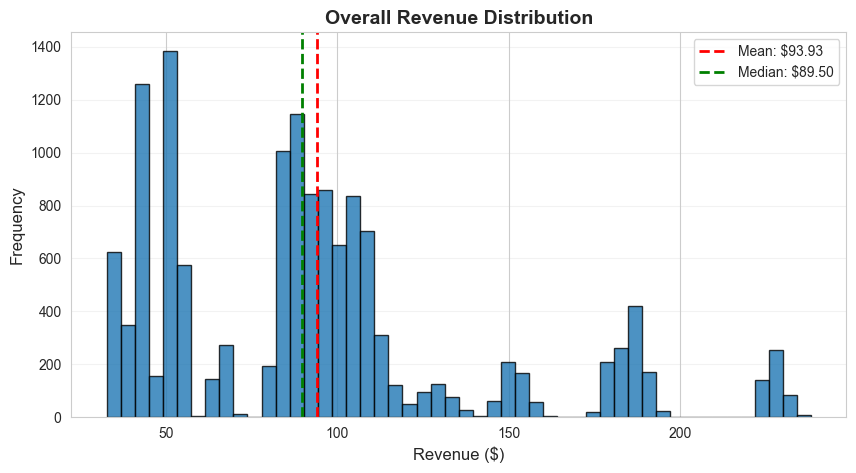

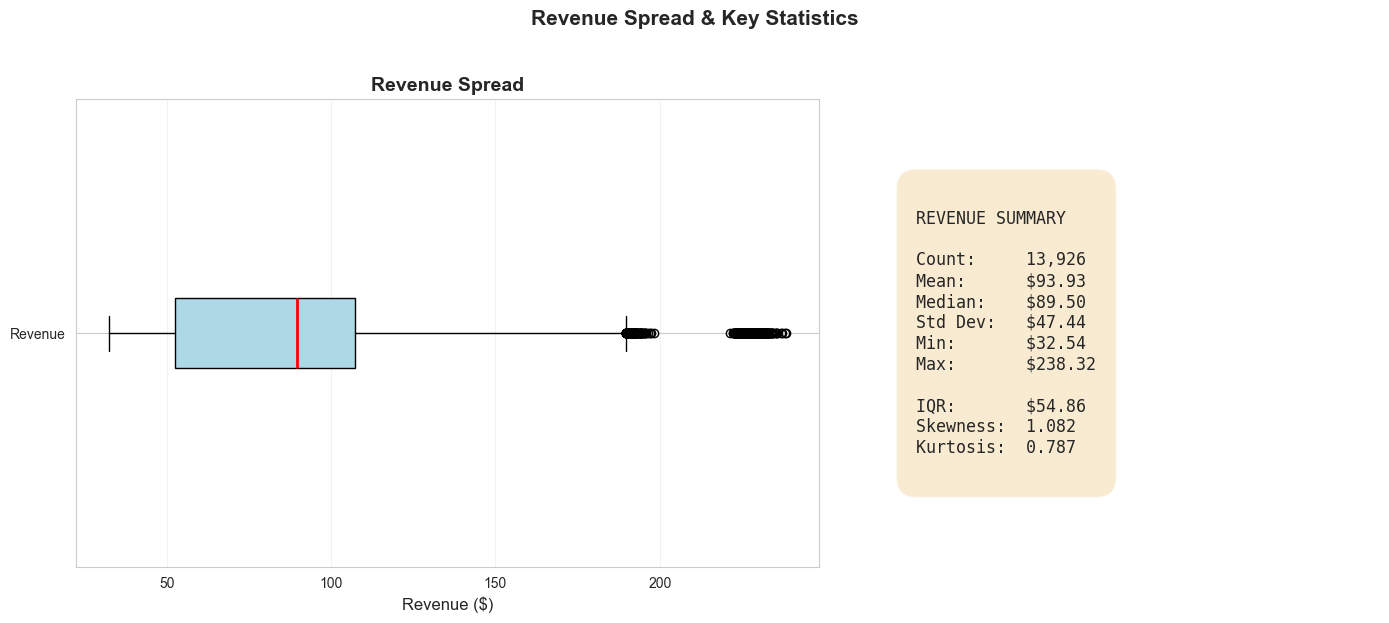

KEY INSIGHT:
Mean vs Median → $93.93 vs $89.50
Skewness → 1.082 (Right-skewed)


In [18]:
import matplotlib.pyplot as plt
import pandas as pd

revenue_clean = df['revenue'].dropna()

# Histogram of Revenue Distribution 
plt.figure(figsize=(10, 5))
plt.hist(revenue_clean, bins=50, edgecolor='black', alpha=0.8)
plt.axvline(revenue_clean.mean(), color='red', linestyle='--', linewidth=2, 
            label=f'Mean: ${revenue_clean.mean():.2f}')
plt.axvline(revenue_clean.median(), color='green', linestyle='--', linewidth=2, 
            label=f'Median: ${revenue_clean.median():.2f}')
plt.title('Overall Revenue Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Revenue ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.25)
plt.savefig('q2_revenue_overall_hist.png', dpi=300, bbox_inches='tight')
plt.show()


# Spread + Summary 
fig, axes = plt.subplots(1, 2, figsize=(14, 6), 
                         gridspec_kw={'width_ratios': [1.5, 1.1]})  # More space for text

# Boxplot
axes[0].boxplot(revenue_clean, vert=False, patch_artist=True,
                boxprops=dict(facecolor='lightblue', color='black'),
                medianprops=dict(color='red', linewidth=2))
axes[0].set_title('Revenue Spread', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Revenue ($)', fontsize=12)
axes[0].set_yticklabels(['Revenue'])
axes[0].grid(axis='x', alpha=0.25)

# Summary text
summary_text = f"""
REVENUE SUMMARY

Count:     {len(revenue_clean):,}
Mean:      ${revenue_clean.mean():,.2f}
Median:    ${revenue_clean.median():,.2f}
Std Dev:   ${revenue_clean.std():,.2f}
Min:       ${revenue_clean.min():,.2f}
Max:       ${revenue_clean.max():,.2f}

IQR:       ${(revenue_clean.quantile(0.75) - revenue_clean.quantile(0.25)):.2f}
Skewness:  {revenue_clean.skew():.3f}
Kurtosis:  {revenue_clean.kurtosis():.3f}
"""

axes[1].axis('off')
axes[1].text(0.15, 0.5, summary_text, 
             fontsize=12, 
             family='monospace',
             verticalalignment='center',
             bbox=dict(boxstyle='round, pad=1.2', facecolor='wheat', alpha=0.6))

fig.suptitle("Revenue Spread & Key Statistics", fontsize=15, fontweight='bold', y=1.03)
plt.tight_layout()
plt.savefig('q2_revenue_overall_spread.png', dpi=300, bbox_inches='tight')
plt.show()


# ===== KEY INSIGHT =====
print("="*60)
print("KEY INSIGHT:")
print("="*60)
print(f"Mean vs Median → ${revenue_clean.mean():.2f} vs ${revenue_clean.median():.2f}")
print(f"Skewness → {revenue_clean.skew():.3f} ({'Right-skewed' if revenue_clean.skew() > 0 else 'Left-skewed'})")
print("="*60)


#### 2b. Revenue Distribution by Sales Method (Multi-Variable Analysis)

/var/folders/94/y14zllwx001_mnk6qm5z5w3c0000gn/T/ipykernel_12735/1985382656.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data_to_plot, labels=sales_methods, patch_artist=True,


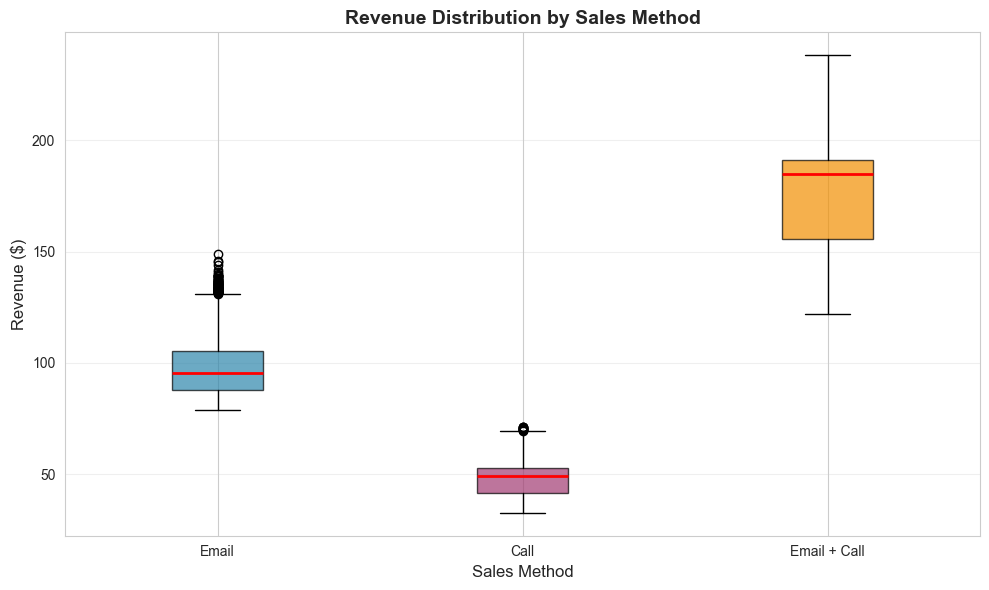

In [19]:
# 1. Box plots by method
sales_methods = ['Email', 'Call', 'Email + Call']
data_to_plot = [df[df['sales_method'] == method]['revenue'].dropna() for method in sales_methods]
colors_box = [color_map[method] for method in sales_methods]

plt.figure(figsize=(10, 6))



bp = plt.boxplot(data_to_plot, labels=sales_methods, patch_artist=True,
                     medianprops=dict(color='red', linewidth=2))

for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

plt.title('Revenue Distribution by Sales Method', fontsize=14, fontweight='bold')
plt.xlabel('Sales Method', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('q2_revenue_by_method.png', dpi=300, bbox_inches='tight')


In [20]:
# Detailed statistics by method
print("="*80)
print("REVENUE DISTRIBUTION STATISTICS BY SALES METHOD")
print("="*80)

stats_by_method = df.groupby('sales_method')['revenue'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std_Dev', 'std'),
    ('Min', 'min'),
    ('Max', 'max'),
    ('IQR', lambda x: x.quantile(0.75) - x.quantile(0.25)),
    ('Skewness', lambda x: x.skew())
]).round(2)

print(stats_by_method)

print("\n" + "="*80)
print("KEY INSIGHTS:")
print("="*80)
for method in sales_methods:
    if method in stats_by_method.index:
        stats = stats_by_method.loc[method]
        print(f"\n{method}:")
        print(f"  • Average: ${stats['Mean']:.2f} (Median: ${stats['Median']:.2f})")
        print(f"  • Range: ${stats['Min']:.2f} to ${stats['Max']:.2f}")
        print(f"  • Std Dev: ${stats['Std_Dev']:.2f}")
        
print("="*80)

REVENUE DISTRIBUTION STATISTICS BY SALES METHOD
              Count    Mean  Median  Std_Dev     Min     Max    IQR  Skewness
sales_method                                                                 
Call           4781   47.60   49.07     8.61   32.54   71.36  11.21      0.45
Email          6922   97.13   95.58    11.21   78.83  148.97  17.29      0.83
Email + Call   2223  183.65  184.74    29.08  122.11  238.32  35.34      0.08

KEY INSIGHTS:

Email:
  • Average: $97.13 (Median: $95.58)
  • Range: $78.83 to $148.97
  • Std Dev: $11.21

Call:
  • Average: $47.60 (Median: $49.07)
  • Range: $32.54 to $71.36
  • Std Dev: $8.61

Email + Call:
  • Average: $183.65 (Median: $184.74)
  • Range: $122.11 to $238.32
  • Std Dev: $29.08


### 🔍 Question 3: Was there any difference in revenue over time for each of the methods?

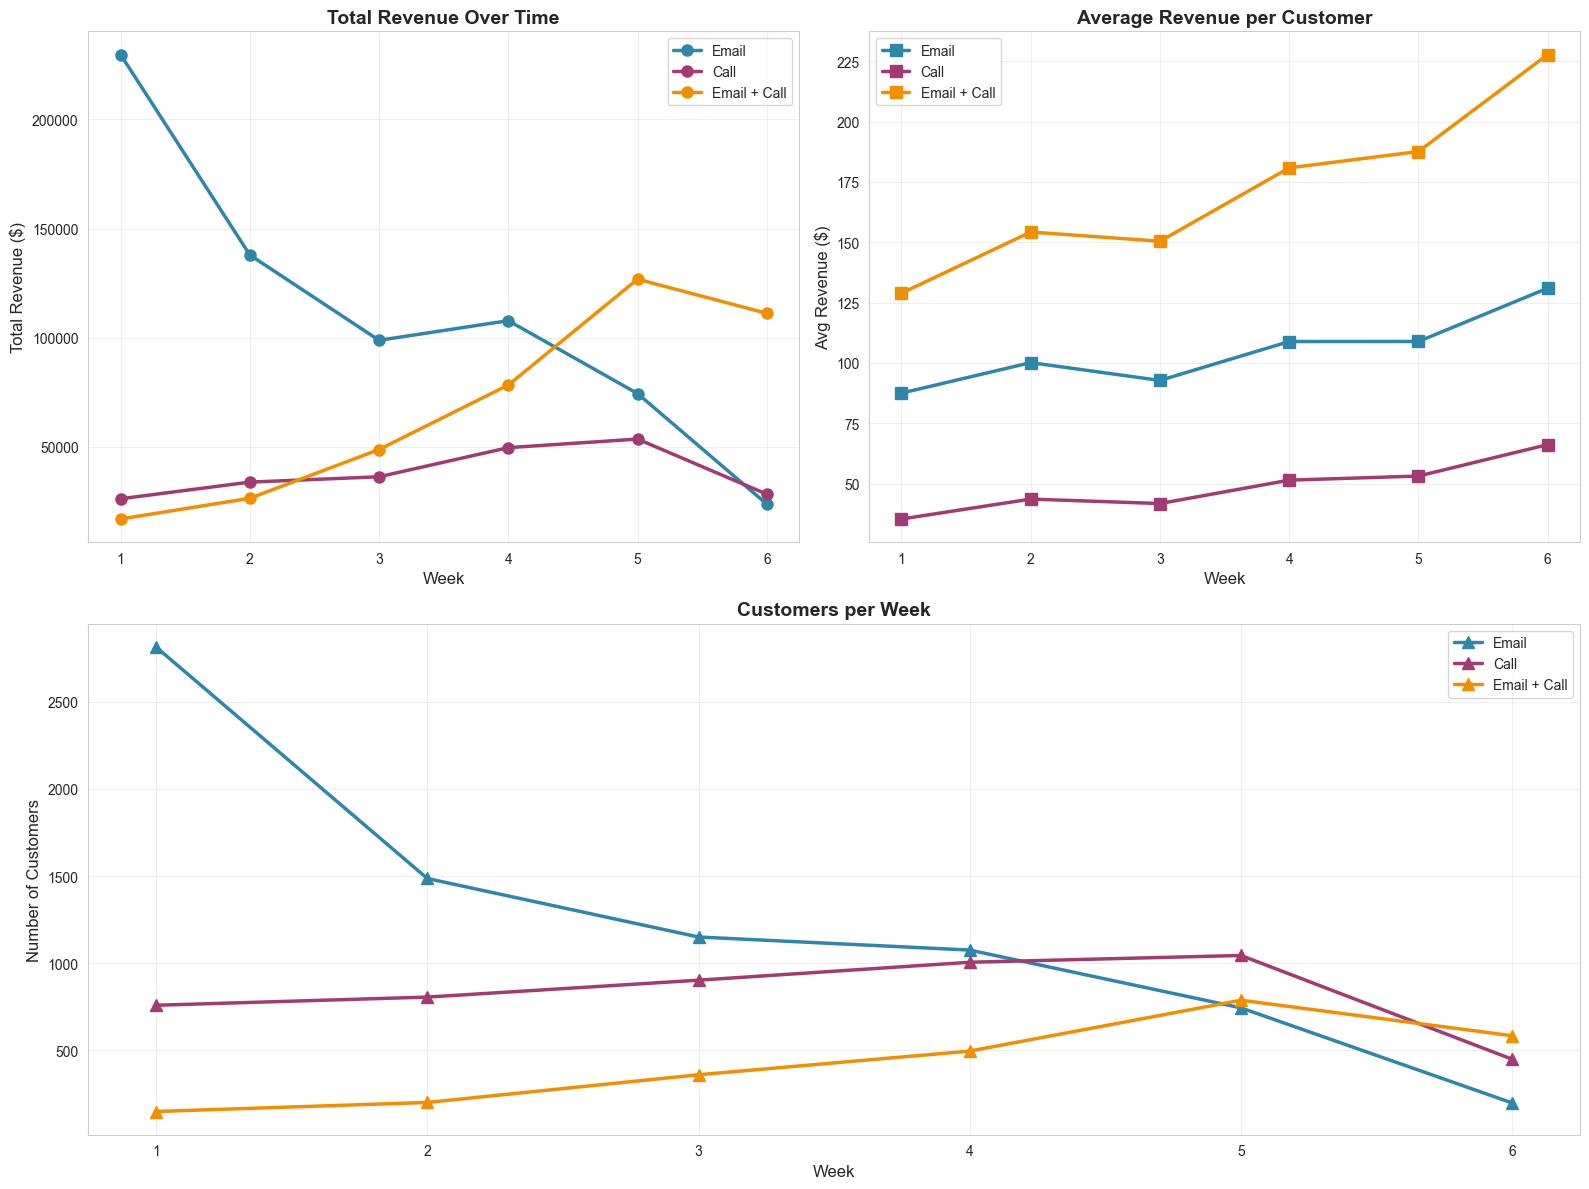

In [21]:
# Revenue trends over time
fig = plt.figure(figsize=(16, 12))

# 2 plots in first row, 1 centered plot in second row
ax1 = plt.subplot(2, 2, 1)  
ax2 = plt.subplot(2, 2, 2)  
ax3 = plt.subplot(2, 1, 2)  

axes = [ax1, ax2, ax3]

# 1. Total Revenue per Week
revenue_by_week = df.groupby(['week', 'sales_method'])['revenue'].sum().unstack()

for method in sales_methods:
    if method in revenue_by_week.columns:
        axes[0].plot(revenue_by_week.index, revenue_by_week[method], 
                     marker='o', linewidth=2.5, markersize=8, 
                     color=color_map[method], label=method)

axes[0].set_title('Total Revenue Over Time', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Week', fontsize=12)
axes[0].set_ylabel('Total Revenue ($)', fontsize=12)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].set_xticks(range(1, 7))

# 2. Average Revenue per Customer per Week
avg_revenue_by_week = df.groupby(['week', 'sales_method'])['revenue'].mean().unstack()

for method in sales_methods:
    if method in avg_revenue_by_week.columns:
        axes[1].plot(avg_revenue_by_week.index, avg_revenue_by_week[method], 
                     marker='s', linewidth=2.5, markersize=8, 
                     color=color_map[method], label=method)

axes[1].set_title('Average Revenue per Customer', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Week', fontsize=12)
axes[1].set_ylabel('Avg Revenue ($)', fontsize=12)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].set_xticks(range(1, 7))

# 3. Number of Customers per Week 
customers_by_week = df.groupby(['week', 'sales_method'])['customer_id'].count().unstack()

for method in sales_methods:
    if method in customers_by_week.columns:
        axes[2].plot(customers_by_week.index, customers_by_week[method], 
                     marker='^', linewidth=2.5, markersize=8, 
                     color=color_map[method], label=method)

axes[2].set_title('Customers per Week', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Week', fontsize=12)
axes[2].set_ylabel('Number of Customers', fontsize=12)
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].set_xticks(range(1, 7))

plt.tight_layout()
plt.savefig('q3_revenue_time.png', dpi=300, bbox_inches='tight')


In [22]:
# Statistical analysis of trends
print("="*80)
print("REVENUE TRENDS ANALYSIS")
print("="*80)

for method in sales_methods:
    method_data = df[df['sales_method'] == method].dropna(subset=['revenue'])
    
    if len(method_data) > 0:
        correlation = method_data['week'].corr(method_data['revenue'])
        
        print(f"\n{method}:")
        print(f"  Correlation (week vs revenue): {correlation:.3f}")
        if abs(correlation) < 0.3:
            trend = "No clear trend"
        elif correlation > 0:
            trend = "Increasing trend"
        else:
            trend = "Decreasing trend"
        print(f"  Trend: {trend}")

print("\n" + "="*80)

REVENUE TRENDS ANALYSIS

Email:
  Correlation (week vs revenue): 0.804
  Trend: Increasing trend

Call:
  Correlation (week vs revenue): 0.929
  Trend: Increasing trend

Email + Call:
  Correlation (week vs revenue): 0.941
  Trend: Increasing trend



### Single Variable Analysis #2: Customer Tenure Distribution

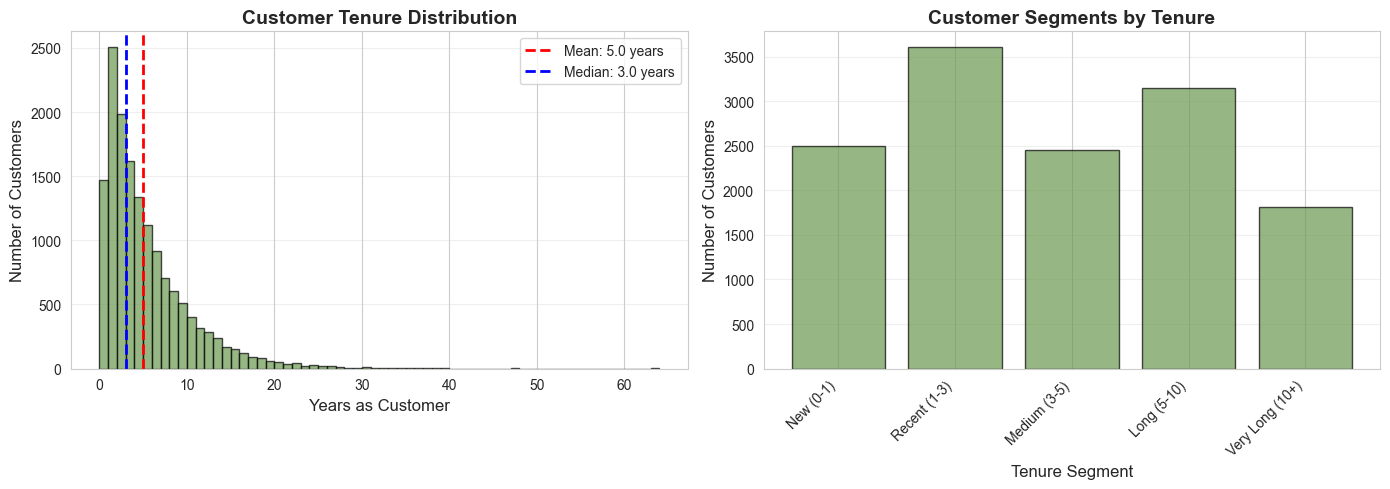

Mean: 4.97 years


In [23]:
# Customer tenure analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Histogram
axes[0].hist(df['years_as_customer'], bins=range(0, df['years_as_customer'].max()+2), 
             color='#6A994E', edgecolor='black', alpha=0.7)
axes[0].axvline(df['years_as_customer'].mean(), color='red', linestyle='--', 
                linewidth=2, label=f'Mean: {df["years_as_customer"].mean():.1f} years')
axes[0].axvline(df['years_as_customer'].median(), color='blue', linestyle='--', 
                linewidth=2, label=f'Median: {df["years_as_customer"].median():.1f} years')
axes[0].set_title('Customer Tenure Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Years as Customer', fontsize=12)
axes[0].set_ylabel('Number of Customers', fontsize=12)
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# 2. Customer segments
tenure_bins = [0, 1, 3, 5, 10, 50]
tenure_labels = ['New (0-1)', 'Recent (1-3)', 'Medium (3-5)', 'Long (5-10)', 'Very Long (10+)']
df['tenure_segment'] = pd.cut(df['years_as_customer'], bins=tenure_bins, labels=tenure_labels)

tenure_counts = df['tenure_segment'].value_counts().sort_index()
axes[1].bar(range(len(tenure_counts)), tenure_counts.values, 
            color='#6A994E', edgecolor='black', alpha=0.7)
axes[1].set_xticks(range(len(tenure_counts)))
axes[1].set_xticklabels(tenure_counts.index, rotation=45, ha='right')
axes[1].set_title('Customer Segments by Tenure', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tenure Segment', fontsize=12)
axes[1].set_ylabel('Number of Customers', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('tenure_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Mean: {df['years_as_customer'].mean():.2f} years")


---

## 4️⃣ BUSINESS METRIC DEFINITION

### Recommended Metric: Revenue per Customer Effort (RPCE)

**Formula:** RPCE = Total Revenue / (Number of Customers × Effort per Customer)

**Purpose:** Measures revenue generated per unit of team effort ($/minute or $/hour)

In [24]:
print("="*90)
print("BUSINESS METRIC: REVENUE PER CUSTOMER EFFORT (RPCE)")
print("="*90)

# Define effort based on business context
effort_minutes = {
    'Email': 3,           # Minimal (automated)
    'Call': 30,           # High (30 min call)
    'Email + Call': 12    # Moderate (email + 10 min call)
}

print("\n📊 METRIC DEFINITION:")
print("-" * 90)
print("RPCE = Total Revenue / (Customers × Effort per Customer)")
print("\nMeasures: Revenue per unit of team effort ($/minute)")
print("Higher RPCE = More efficient use of sales team time")

# Calculate RPCE
print("\n" + "="*90)
print("CURRENT RPCE VALUES")
print("="*90)

rpce_results = []

# Table header
print(f"\n{'Method':<15} {'Revenue':>15} {'Customers':>12} {'Effort per cus.r':>10} {'Total Hrs':>12} {'RPCE/hr':>15}")
print("-" * 90)

for method in sales_methods:
    if method in customer_counts.index and method in revenue_by_method.index:
        total_revenue = revenue_by_method[method]
        num_customers = customer_counts[method]
        number_of_minutes_per_customer = effort_minutes[method]
        total_effort = num_customers * number_of_minutes_per_customer
        rpce = total_revenue / total_effort
        
        rpce_results.append({
            'Method': method,
            'Total_Revenue': total_revenue,
            'Customers': num_customers,
            'Effort_min': number_of_minutes_per_customer,
            'Total_Effort_hours': total_effort / 60,
            'RPCE_per_hour': rpce * 60
        })
        
        # Table row
        print(f"{method:<15} {total_revenue:>14,.2f}$ {num_customers:>12,} {number_of_minutes_per_customer:>8} min {total_effort/60:>11,.1f} {rpce*60:>14,.2f}$")

rpce_df = pd.DataFrame(rpce_results)

print("\n" + "="*90)
print("RPCE RANKING (Higher is Better):")
print("="*90)
rpce_ranked = rpce_df.sort_values('RPCE_per_hour', ascending=False)
for idx, (_, row) in enumerate(rpce_ranked.iterrows(), 1):
    print(f"{idx}. {row['Method']:15s}: ${row['RPCE_per_hour']:>10,.2f}/hour")
print("="*90)

BUSINESS METRIC: REVENUE PER CUSTOMER EFFORT (RPCE)

📊 METRIC DEFINITION:
------------------------------------------------------------------------------------------
RPCE = Total Revenue / (Customers × Effort per Customer)

Measures: Revenue per unit of team effort ($/minute)
Higher RPCE = More efficient use of sales team time

CURRENT RPCE VALUES

Method                  Revenue    Customers Effort per cus.r    Total Hrs         RPCE/hr
------------------------------------------------------------------------------------------
Email               672,317.83$        7,466        3 min       373.3       1,801.01$
Call                227,563.49$        4,962       30 min     2,481.0          91.72$
Email + Call        408,256.69$        2,572       12 min       514.4         793.66$

RPCE RANKING (Higher is Better):
1. Email          : $  1,801.01/hour
2. Email + Call   : $    793.66/hour
3. Call           : $     91.72/hour


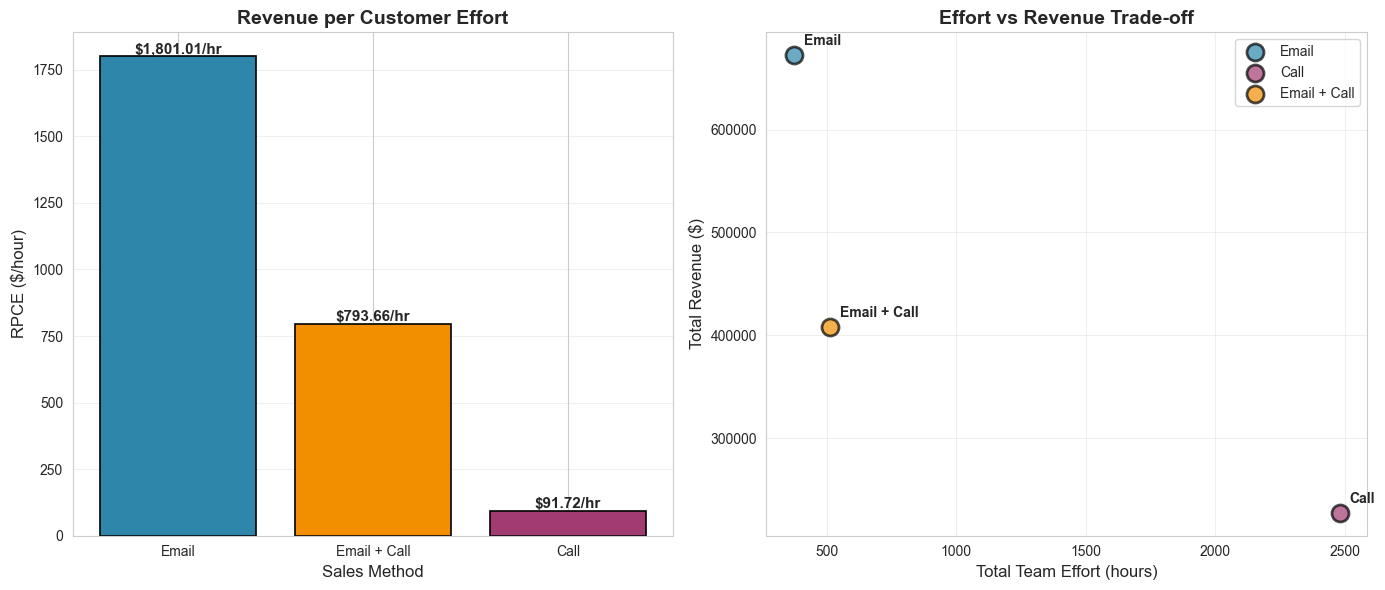

In [25]:
# Visualize RPCE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 1. RPCE by method
rpce_sorted = rpce_df.sort_values('RPCE_per_hour', ascending=False)
colors_rpce = [color_map[method] for method in rpce_sorted['Method']]

bars = axes[0].bar(rpce_sorted['Method'], rpce_sorted['RPCE_per_hour'],
                   color=colors_rpce, edgecolor='black', linewidth=1.2)
axes[0].set_title('Revenue per Customer Effort', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sales Method', fontsize=12)
axes[0].set_ylabel('RPCE ($/hour)', fontsize=12)
axes[0].grid(axis='y', alpha=0.3)

for bar in bars:
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height,
                f'${height:,.2f}/hr',
                ha='center', va='bottom', fontsize=11, fontweight='bold')

# 2. Effort vs Revenue
for _, row in rpce_df.iterrows():
    axes[1].scatter(row['Total_Effort_hours'], row['Total_Revenue'], 
                   s=150, alpha=0.7, color=color_map[row['Method']], 
                   edgecolors='black', linewidth=2,
                   label=row['Method'])
    
    axes[1].annotate(row['Method'], 
                    (row['Total_Effort_hours'], row['Total_Revenue']),
                    xytext=(10, 10), textcoords='offset pixels',
                    fontsize=10, fontweight='bold')

axes[1].set_title('Effort vs Revenue Trade-off', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Team Effort (hours)', fontsize=12)
axes[1].set_ylabel('Total Revenue ($)', fontsize=12)
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()
plt.savefig('rpce_metric.png', dpi=300, bbox_inches='tight')


### How to Monitor This Metric

In [26]:
print("="*80)
print("HOW TO MONITOR RPCE")
print("="*80)
print("""
1️⃣ TRACKING FREQUENCY:
   • Calculate weekly for each sales method
   • Review monthly trends
   • Compare quarter-over-quarter

2️⃣ DATA REQUIRED:
   • Total revenue by sales method
   • Number of customers contacted
   • Actual time spent per customer (track in CRM)

3️⃣ TARGET THRESHOLDS:
   • Set minimum acceptable RPCE (e.g., $150/hour)
   • Alert if method drops below threshold

4️⃣ DASHBOARD METRICS:
   • RPCE by method (bar chart)
   • RPCE trend over time (line chart)
   • Week-over-week change (%)
   
5️⃣ DECISION RULES:
   • RPCE increases → Continue/expand method
   • RPCE decreases → Investigate and optimize
   • Compare methods → Allocate to highest RPCE
""")

print("="*80)
print("INITIAL BASELINE VALUES:")
print("="*80)
for _, row in rpce_df.iterrows():
    print(f"{row['Method']:15s}: ${row['RPCE_per_hour']:>8,.2f}/hour (BASELINE)")
print("\nUse these as benchmarks for future campaigns.")
print("="*80)

HOW TO MONITOR RPCE

1️⃣ TRACKING FREQUENCY:
   • Calculate weekly for each sales method
   • Review monthly trends
   • Compare quarter-over-quarter

2️⃣ DATA REQUIRED:
   • Total revenue by sales method
   • Number of customers contacted
   • Actual time spent per customer (track in CRM)

3️⃣ TARGET THRESHOLDS:
   • Set minimum acceptable RPCE (e.g., $150/hour)
   • Alert if method drops below threshold

4️⃣ DASHBOARD METRICS:
   • RPCE by method (bar chart)
   • RPCE trend over time (line chart)
   • Week-over-week change (%)

5️⃣ DECISION RULES:
   • RPCE increases → Continue/expand method
   • RPCE decreases → Investigate and optimize
   • Compare methods → Allocate to highest RPCE

INITIAL BASELINE VALUES:
Email          : $1,801.01/hour (BASELINE)
Call           : $   91.72/hour (BASELINE)
Email + Call   : $  793.66/hour (BASELINE)

Use these as benchmarks for future campaigns.


---

## 5️⃣ RECOMMENDATIONS & FINAL SUMMARY

### 🔍 Question 4: Which method should we continue to use?

In [27]:
print("="*80)
print("FINAL RECOMMENDATION")
print("="*80)

# Determine winner
best_rpce = rpce_df.loc[rpce_df['RPCE_per_hour'].idxmax(), 'Method']
best_total_revenue = revenue_by_method.idxmax()
lowest_effort = rpce_df.loc[rpce_df['Effort_min'].idxmin(), 'Method']

print(f"\n🏆 Best Efficiency (RPCE):        {best_rpce}")
print(f"💰 Highest Total Revenue:          {best_total_revenue}")
print(f"⚡ Lowest Team Effort:              {lowest_effort}")

print("\n" + "="*80)
print("FINAL RECOMMENDATION:")
print("="*80)
print("""
🥇 PRIMARY: Email
   • Highest RPCE (most efficient)
   • Minimal team time (2 min vs 12-30 min)
   • Scalable to larger customer base
   • Use as default for all customers

📞 SECONDARY: Email + Call
   • Good middle ground
   • Use for high-value prospects
   • Reserve for customers needing personal touch

❌ NOT RECOMMENDED: Call-Only
   • Lowest RPCE
   • High effort (30 min per customer)
   • Not scalable
   • Reserve only for VIP clients
""")
print("="*80)

FINAL RECOMMENDATION

🏆 Best Efficiency (RPCE):        Email
💰 Highest Total Revenue:          Email
⚡ Lowest Team Effort:              Email

FINAL RECOMMENDATION:

🥇 PRIMARY: Email
   • Highest RPCE (most efficient)
   • Minimal team time (2 min vs 12-30 min)
   • Scalable to larger customer base
   • Use as default for all customers

📞 SECONDARY: Email + Call
   • Good middle ground
   • Use for high-value prospects
   • Reserve for customers needing personal touch

❌ NOT RECOMMENDED: Call-Only
   • Lowest RPCE
   • High effort (30 min per customer)
   • Not scalable
   • Reserve only for VIP clients

